In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math
from PIL import Image
import numpy as np 
import copy
from collections import deque


In [2]:
#On running the code block output is shown

def opticalFlow(referenceFrameSec):
    cap = cv2.VideoCapture(r"I:\murali\Assignment3\outpy.avi")
    ret, first_frame = cap.read()
    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(first_frame)
    mask[..., 1] = 255
    i=1
    while(cap.isOpened()):
        ret, frame = cap.read()
        cv2.imshow("Input Window", frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculates dense optical flow by Farneback method
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)
        # Computes the magnitude and angle of the 2D vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        # Sets image hue according to the optical flow
        # direction
        mask[..., 0] = angle * 180 / np.pi / 2
        # Sets image value according to the optical flow
        # magnitude (normalized)
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        # Converts HSV to RGB (BGR) color representation
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        #pens a new window and displays the output frame
        cv2.imshow("dense optical flow", rgb)
        # Updates previous frame
        if (referenceFrameSec == 1):
            prev_gray = gray
        elif (referenceFrameSec != 1):
            if i%referenceFrameSec == 0:
                prev_gray = gray    
        if(i%30 ==0 ):
            plt.axis('off')
            plt.imshow(rgb,cmap='gray', vmin=0, vmax=255)
            plt.show()
                
        i=i+1
        # Frames are read by intervals of 1 millisecond. The
        # programs breaks out of the while loop when the
        # user presses the 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

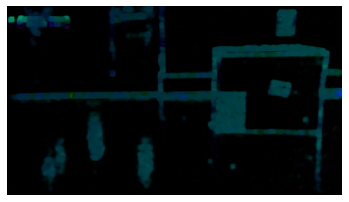

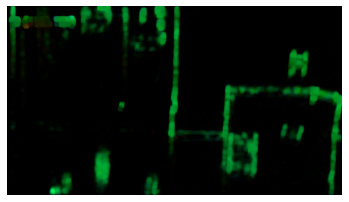

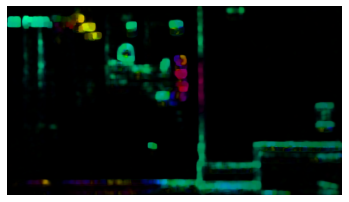

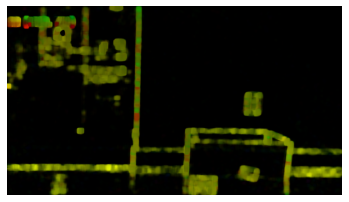

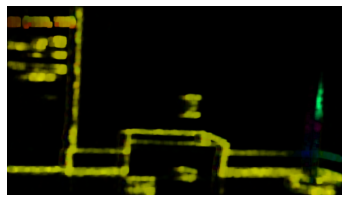

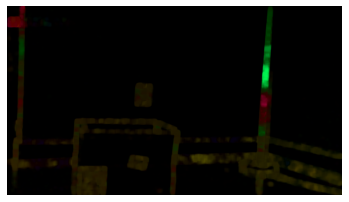

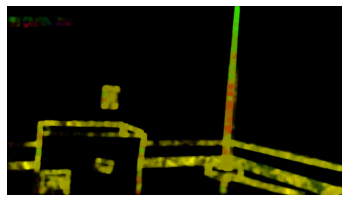

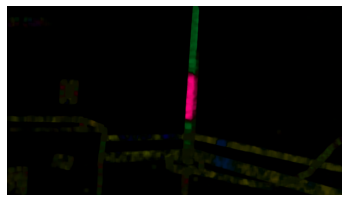

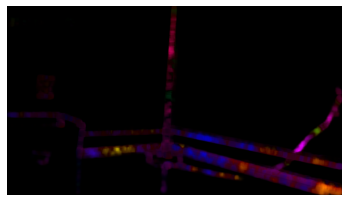

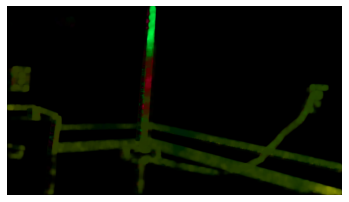

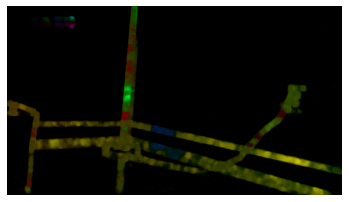

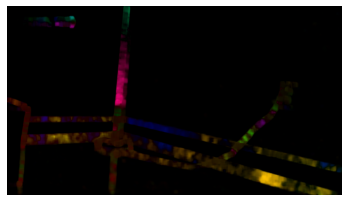

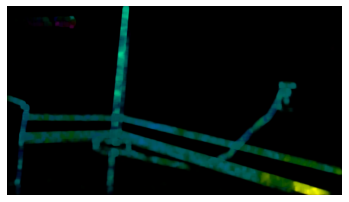

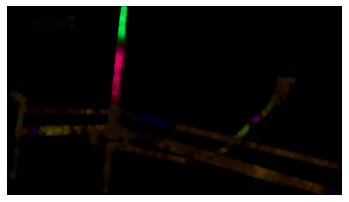

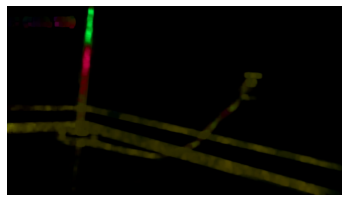

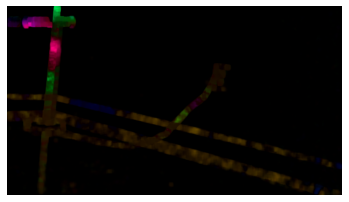

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-5rb_9df3\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [3]:
opticalFlow(1)

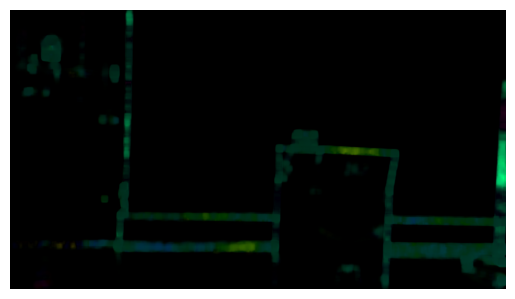

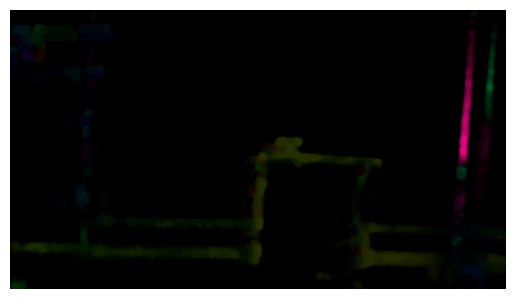

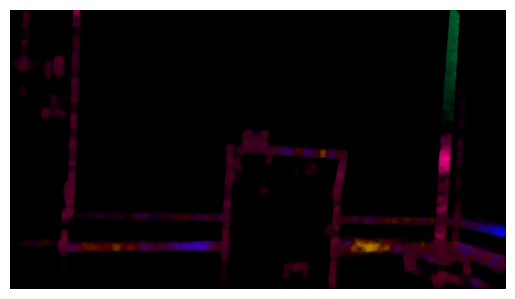

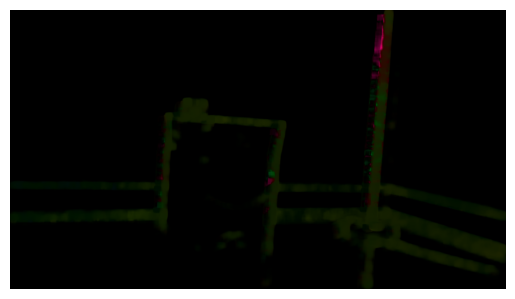

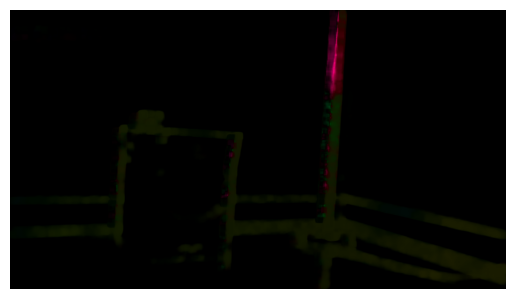

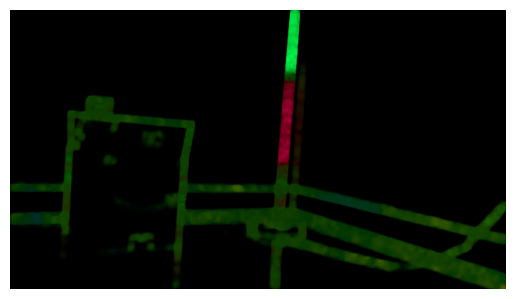

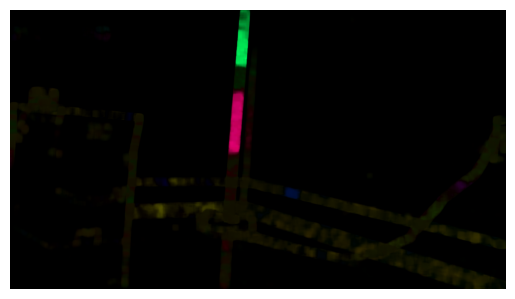

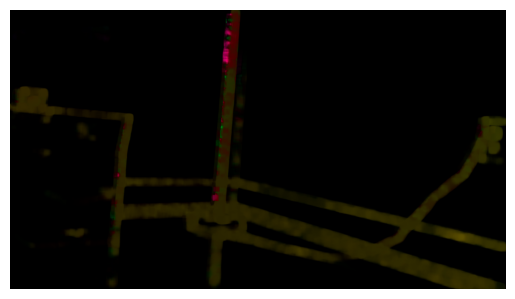

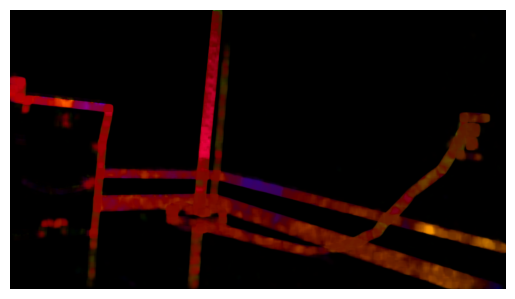

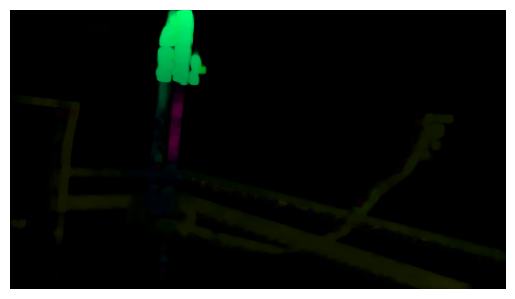

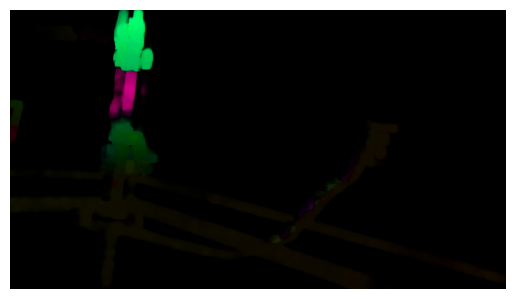

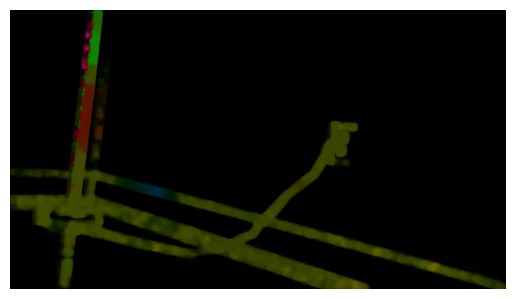

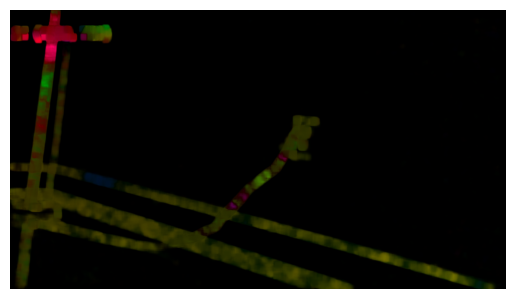

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-5rb_9df3\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [ ]:
opticalFlow(11)

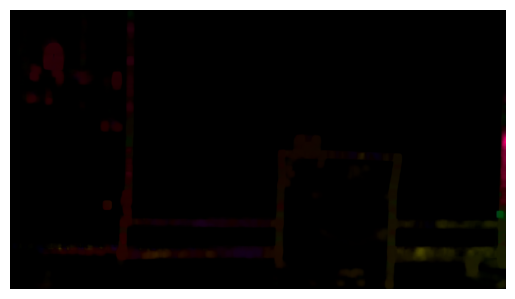

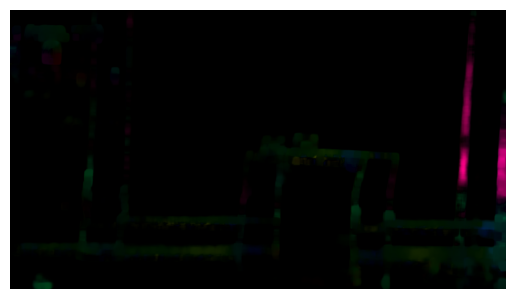

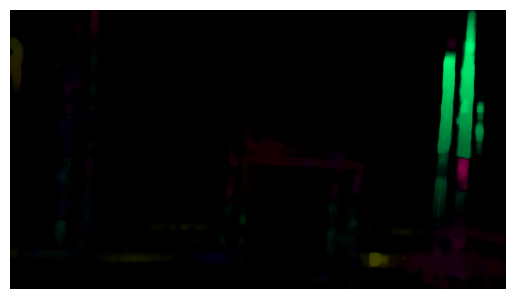

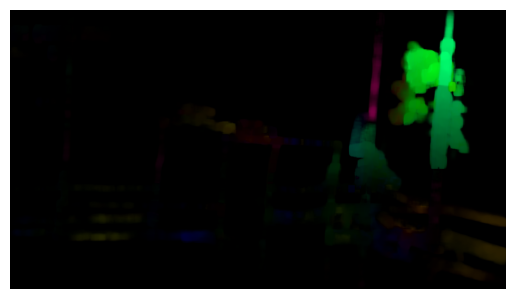

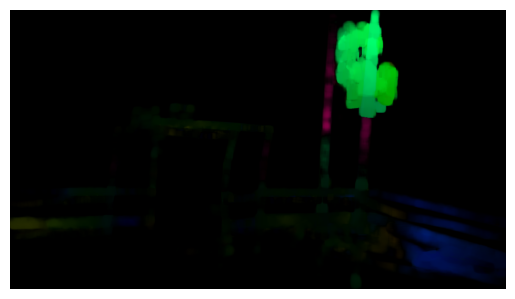

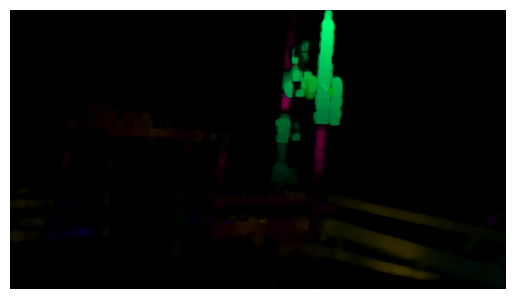

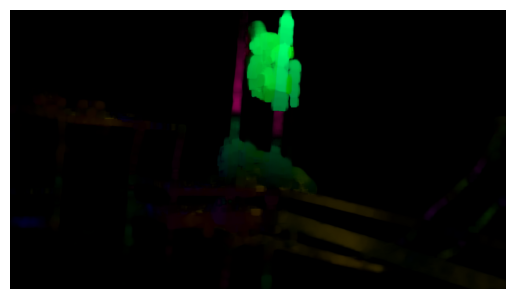

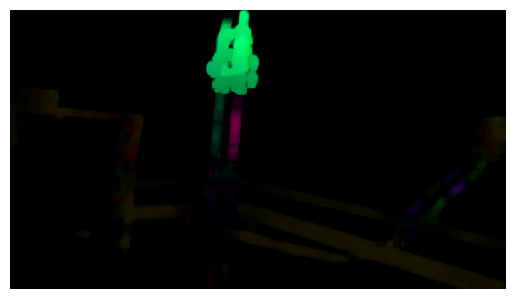

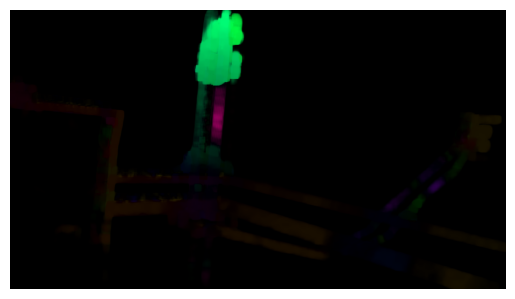

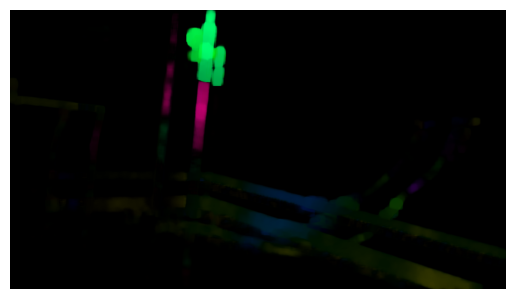

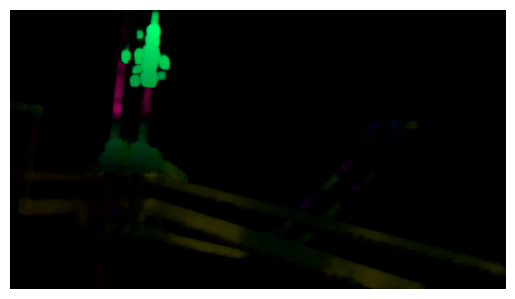

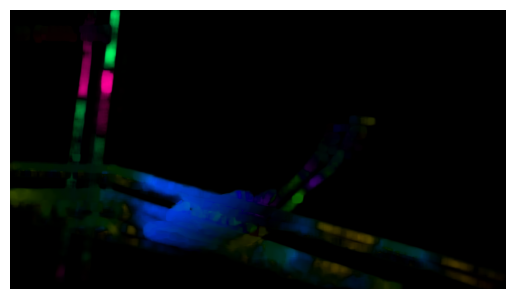

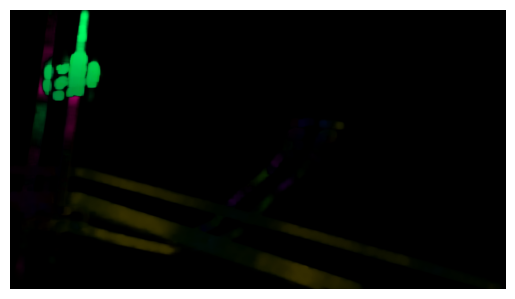

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-5rb_9df3\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [ ]:
opticalFlow(31)